# STA 141B: Homework 5
Winter 2018

## Student Information

After the colons (in the same line) please write just your first name, last name, and the 9 digit student ID number below.

First Name: Suyun

Last Name: Bae

Student ID: 912060060

## Instructions

We use a script that extracts your answers by looking for cells in between the cells containing the exercise statements.  So you 

- MUST add cells in between the exercise statements and add answers within them and
- MUST NOT modify the existing cells, particularly not the problem statement

To make markdown, please switch the cell type to markdown (from code) - you can hit 'm' when you are in command mode - and use the markdown language.  For a brief tutorial see: https://daringfireball.net/projects/markdown/syntax

# Housing data

In this assignment, you'll analyze a collection of data sets from the [San Francisco Open Data Portal](http://data.sfgov.org/) and [Zillow](https://www.zillow.com/). The data sets have been stored in the SQLite database `sf_data.sqlite`, which you can [download here](http://anson.ucdavis.edu/~nulle/sf_data.sqlite). The database contains the following tables:

Table                   | Description
----------------------- | -----------
`crime`                 | Crime reports dating back to 2010.
`mobile_food_locations` | List of all locations where mobile food vendors sell.
`mobile_food_permits`   | List of all mobile food vendor permits. More details [here](https://data.sfgov.org/api/views/rqzj-sfat/files/8g2f5RV4PEk0_b24iJEtgEet9gnh_eA27GlqoOjjK4k?download=true&filename=DPW_DataDictionary_Mobile-Food-Facility-Permit.pdf).
`mobile_food_schedule`  | Schedules for mobile food vendors.
`noise`                 | Noise complaints dating back to August 2015.
`parking`               | List of all parking lots.
`parks`                 | List of all parks.
`schools`               | List of all schools.
`zillow`                | Zillow rent and housing statistics dating back to 1996. More details [here](https://www.zillow.com/research/data/).

The `mobile_food_` tables are explicitly connected through the `locationid` and `permit` columns. The other tables are not connected, but you may be able to connect them using dates, latitude/longitude, or postal codes.

Shapefiles for US postal codes are available [here](https://www.census.gov/geo/maps-data/data/cbf/cbf_zcta.html). These may be useful for converting latitude/longitude to postal codes.

Shapefiles for San Francisco Neighborhoods are available [here](https://data.sfgov.org/Geographic-Locations-and-Boundaries/SF-Find-Neighborhoods/pty2-tcw4).

__Exercise 1.1.__ (20 pts) Which mobile food vendor(s) sells at the most locations?

In [1]:
import sqlite3 as sql
import pandas as pd

In [2]:
db = sql.connect("data/sf_data.sqlite")
db.row_factory = sql.Row

In [3]:
pd.read_sql("SELECT * FROM sqlite_master", db)

,type,name,tbl_name,rootpage,sql
0,table,crime,crime,2,"CREATE TABLE ""crime"" (\n""IncidntNum"" INTEGER,\..."
1,table,noise,noise,35775,"CREATE TABLE ""noise"" (\n""CaseID"" INTEGER,\n ""..."
2,table,parking,parking,35921,"CREATE TABLE ""parking"" (\n""Owner"" TEXT,\n ""Ad..."
3,table,schools,schools,35944,"CREATE TABLE ""schools"" (\n""Name"" TEXT,\n ""Ent..."
4,table,parks,parks,35961,"CREATE TABLE ""parks"" (\n""Name"" TEXT,\n ""Type""..."
5,table,zillow,zillow,35967,"CREATE TABLE ""zillow"" (\n""RegionName"" INTEGER,..."
6,table,mobile_food_permits,mobile_food_permits,36050,"CREATE TABLE ""mobile_food_permits"" (\n""permit""..."
7,table,mobile_food_locations,mobile_food_locations,36060,"CREATE TABLE ""mobile_food_locations"" (\n""locat..."
8,table,mobile_food_schedule,mobile_food_schedule,36079,"CREATE TABLE ""mobile_food_schedule"" (\n""locati..."


In [4]:
cursor = db.execute("SELECT * FROM sqlite_master")
rows = cursor.fetchall()

In [5]:
rows[0].keys()

['type', 'name', 'tbl_name', 'rootpage', 'sql']

In [6]:
pd.read_sql("SELECT * FROM mobile_food_locations", db)

,locationid,LocationDescription,Address,Latitude,Longitude
0,762182,TOWNSEND ST: 05TH ST to 06TH ST (400 - 499),444 TOWNSEND ST,37.774871,-122.398532
1,437211,MISSOURI ST: 20TH ST to SIERRA ST (500 - 630),555 MISSOURI ST,37.759304,-122.395902
2,765880,17TH ST: SAN BRUNO AVE to UTAH ST (2200 - 2299),2222 17TH ST,37.765216,-122.406007
3,765690,CESAR CHAVEZ ST: EVANS AVE to KANSAS ST (2100 ...,2323 CESAR CHAVEZ ST,37.748801,-122.400552
4,751253,FOLSOM ST: 14TH ST to 15TH ST (1800 - 1899),1800 FOLSOM ST,37.767852,-122.416105
5,761933,05TH ST: BLUXOME ST to TOWNSEND ST (650 - 699),670 05TH ST,37.775589,-122.397977
6,526124,INDUSTRIAL ST: PALOU AVE to QUESADA AVE (51 - ...,75 INDUSTRIAL ST,37.739217,-122.400864
7,765527,FITZGERALD AVE: HAWES ST to INGALLS ST (1100 -...,1104 FITZGERALD AVE,37.720175,-122.389407
8,761934,BRANNAN ST: STANFORD ST to JACK LONDON ALY (32...,340 BRANNAN ST,37.781265,-122.393229
9,763522,BUSH ST: 01ST ST \ MARKET ST to BATTERY ST (1 ...,1 BUSH ST,37.790922,-122.400100


In [7]:
df = pd.read_sql("SELECT * FROM mobile_food_schedule", db)

df

,locationid,permit,DayOfWeek,EndHour,StartHour
0,305727,11MFF-0040,Mo,15,10
1,305727,11MFF-0040,Tu,15,10
2,305727,11MFF-0040,We,15,10
3,305727,11MFF-0040,Th,15,10
4,305727,11MFF-0040,Fr,15,10
5,305727,11MFF-0040,Sa,15,10
6,305727,11MFF-0040,Su,15,10
7,305727,11MFF-0040,Mo,20,17
8,305727,11MFF-0040,Tu,20,17
9,305727,11MFF-0040,We,20,17


In [8]:
permit =list(df.permit)
location =list(df.locationid)

In [9]:
import operator
from collections import defaultdict
d = defaultdict(list)
for i,key in enumerate(permit): 
    if location[i] not in d[key]:            #to add only unique values (ex: '693':'goa')
        d[key].append(location[i]) 
        
count = dict()
for key, value in d.items():
    #print value
    count[key] = len([item for item in value if item])
    

sorted_count = sorted(count.items(), key=operator.itemgetter(1), reverse=True)
sorted_count



[('17MFF-0110', 58),
 ('13MFF-0102', 37),
 ('17MFF-0111', 37),
 ('17MFF-0090', 33),
 ('16MFF-0051', 23),
 ('16MFF-0048', 21),
 ('14MFF-0001', 19),
 ('14MFF-0109', 19),
 ('17MFF-0084', 19),
 ('16MFF-0037', 17),
 ('17MFF-0073', 17),
 ('17MFF-0091', 16),
 ('17MFF-0089', 15),
 ('17MFF-0095', 15),
 ('16MFF-0027', 13),
 ('17MFF-0092', 13),
 ('17MFF-0109', 13),
 ('14MFF-0034', 11),
 ('16MFF-0069', 10),
 ('16MFF-0019', 7),
 ('16MFF-0053', 7),
 ('17MFF-0125', 7),
 ('14MFF-0035', 5),
 ('16MFF-0047', 5),
 ('17MFF-0078', 5),
 ('17MFF-0079', 5),
 ('17MFF-0104', 5),
 ('15MFF-0122', 4),
 ('16MFF-0046', 4),
 ('16MFF-0096', 4),
 ('17MFF-0094', 4),
 ('17MFF-0103', 4),
 ('13MFF-0112', 3),
 ('16MFF-0032', 3),
 ('16MFF-0071', 3),
 ('15MFF-0145', 3),
 ('16MFF-0102', 3),
 ('16MFF-0142', 3),
 ('17MFF-0064', 3),
 ('17MFF-0066', 3),
 ('17MFF-0069', 3),
 ('17MFF-0087', 3),
 ('17MFF-0097', 3),
 ('17MFF-0098', 3),
 ('11MFF-0040', 2),
 ('11MFF-0177', 2),
 ('13MFF-0128', 2),
 ('14MFF-0009', 2),
 ('14MFF-0030', 2),
 

In [10]:
pd.read_sql("SELECT * FROM mobile_food_permits WHERE permit = '17MFF-0110'", db)

,permit,Status,Applicant,FacilityType,FoodItems,PriorPermit,Approved,Expiration
0,17MFF-0110,REQUESTED,May Catering,Truck,Cold Truck: Sandwiches: fruit: snacks: candy: ...,1,None,2018-05-06 12:00:00


From this sorted dictionary, we can see that permit `17MFF-0110` or May Catering serves at more locations compared to other food trucks, as they sell at 58 different, unique locations in San Francisco.

__Exercise 1.2.__ (40 pts) Ask and use the database to analyze 5 questions about San Francisco. For each question, write at least 150 words and support your answer with plots. Make a map for at least 2 of the 5 questions.

You should try to come up with some questions on your own, but these are examples of reasonable questions:

* Which parts of the city are the most and least expensive?
* Which parts of the city are the most dangerous (and at what times)?
* Are noise complaints and mobile food vendors related?
* What are the best times and places to find food trucks?
* Is there a relationship between housing prices and any of the other tables?

Please make sure to clearly state each of your questions in your submission.

In [11]:
# import sys
# !{sys.executable} -m pip install uszipcode

%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import uszipcode

import fiona

import geopandas as gpd         # conda install -c conda-forge geopandas
import osmnx as ox              # conda install -c conda-forge osmnx
import shapely.geometry as geom # conda install -c conda-forge shapely

In [14]:
zillow = pd.read_sql("SELECT * FROM zillow", db)

In [15]:
zipcode_unique = pd.unique(zillow["RegionName"])

In [16]:
from uszipcode import ZipcodeSearchEngine
search = ZipcodeSearchEngine()
zipcode = search.by_zipcode("10001")
zipcode= dict(zipcode)
zipcode["Latitude"]
zipcode

lat = []
long = []

for postal in zipcode_unique:
    from uszipcode import ZipcodeSearchEngine
    search = ZipcodeSearchEngine()
    zipcode = search.by_zipcode(str(postal))
    zipcode= dict(zipcode)
    lat.append(zipcode["Latitude"])
    long.append(zipcode["Longitude"])

In [52]:

# aggregated_zillow_Points = pd.DataFrame()
aggregated_zillow_Polygon = pd.DataFrame()
means = []

for zipcode in zipcode_unique:
    zillowP = pd.read_sql("SELECT * FROM zillow WHERE RegionName =" + str(zipcode) +"", db)
    mean = np.mean(zillowP["MedianSoldPricePerSqft_AllHomes"])
    means.append(mean)
#     aggregated_zillow["Average_MedianSoldPrice_AllHome"] = (mean)
# aggregated_zillow_Points["RegionName"] = zipcode_unique
# aggregated_zillow_Points["Average_MedianSoldPrice_AllHome"] = means
# aggregated_zillow_Points["Latitude"] = lat
# aggregated_zillow_Points["Longitude"] = long



aggregated_zillow_Polygon["RegionName"] = zipcode_unique
aggregated_zillow_Polygon["Average_MedianSoldPrice_AllHome"] = means
aggregated_zillow_Polygon["Latitude"] = lat
aggregated_zillow_Polygon["Longitude"] = long


aggregated_zillow_Polygon

,RegionName,Average_MedianSoldPrice_AllHome,Latitude,Longitude
0,94109,618.325709,37.792979,-122.421242
1,94110,543.998864,37.748582,-122.418411
2,94122,453.210167,37.759748,-122.475029
3,94080,375.629802,37.653190,-122.418411
4,94112,416.744886,37.722549,-122.441062
5,94115,611.771452,37.787752,-122.438231
6,94117,580.217632,37.771718,-122.443893
7,94121,467.890585,37.781345,-122.497668
8,94102,626.417276,37.778687,-122.421242
9,94118,558.667047,37.782289,-122.463708


In [53]:
us_zipcode = gpd.read_file("data/shapefiles/cb_2016_us_zcta510_500k/cb_2016_us_zcta510_500k.shp")


In [54]:
df = pd.DataFrame()
for zipcode in aggregated_zillow_Polygon.RegionName:
    df = df.append(us_zipcode[us_zipcode.ZCTA5CE10 == str(zipcode)])

In [27]:
df = df.rename(columns={'ZCTA5CE10': 'RegionName'})

In [28]:
# print(df["geometry"].shape)
# print(zillow["geometry"].shape)

# data = pd.DataFrame([])
# for i in df["geometry"]:
#     zillow["geometry"] = geometry[i]

# reindex from 0
zillow_reindex = aggregated_zillow_Polygon.reset_index()
df_reindex = df.reset_index()
aggregated_zillow_Polygon = gpd.GeoDataFrame(zillow_reindex, geometry=df_reindex["geometry"])
del aggregated_zillow_Polygon['index']

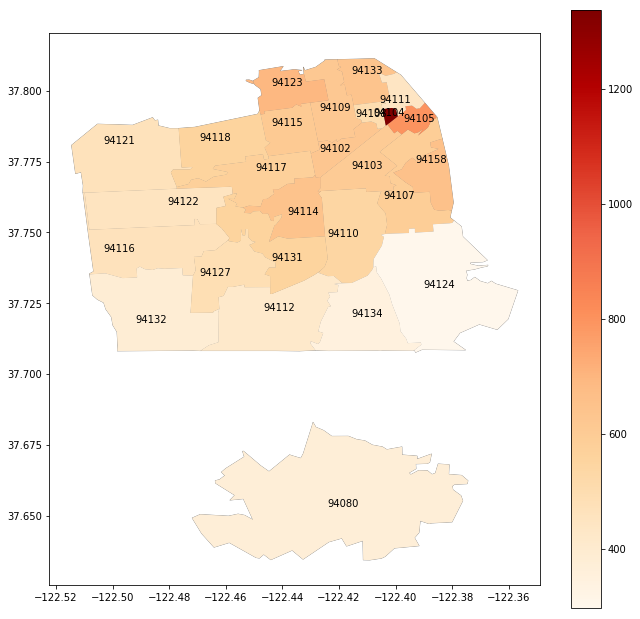

In [29]:
ax = aggregated_zillow_Polygon.plot(edgecolor = "gray" , 
              column = "Average_MedianSoldPrice_AllHome",
              cmap='OrRd', 
              legend=True,
              k=3,
              linewidth = 0.6, figsize = (11, 11) )

aggregated_zillow_Polygon.plot(ax = ax, column = "Average_MedianSoldPrice_AllHome", cmap='OrRd')


def add_label(row):
    coords = row.geometry.representative_point().coords[0]
    ax.annotate(row.RegionName, xy = coords, horizontalalignment = "center", color="black", size="medium")
    
# Call add_label() on each row.
aggregated_zillow_Points.apply(add_label, axis = 1)

# Don't print out the result from the .apply().
plt.show()
# cbar = plt.colorbar()  # draw colorbar
# cbar.ax.set_ylabel('Nutrition (kcal)')


# aggregated_zillow.plot(ax = ax)

*Which parts of the city are the most and least expensive?*


To answer this question we have created the map above using Zillow's data as well as the US Zipcode's data. In order to distinguish the richest and poorest neighborhoods, we first aggregated Zillow's data of `MedianSoldPrice_AllHome` based on the given zipcode for each area. From there, we have calculated the average in order to plot the value of each neightborhood using US Zipcode's polygon data. Therefore, we can immediately state that the richest neighborhood of SF is `94104`, which is depicted as a dark red on the map. This immediately stands out from the rest of the neighborhoods as they are all lighter. Looking up `94104`, we can that this zipcode area is part of the Financial Distrct. Next, looking at the second most expensive neighborhood, we notice that it is `94105`, which is part of the Supervisor District. Comparing these neighborhoods, we can see that their average median-sold-price cost is \$1336.128581 \$798.257824 respectively. Now comparing to the least expensive areas, we can see that the poorest area is `94124` at the cost of \$297.008046. There seems to be a general pattern of the expensive neighborhoods being part of and close to the tourist attractions of SF, while the poorer parts seem to dissipate throughout San Francisco. However, it is important to note the accuracy of this data. First, many of the data were missing and were eliminated from the final dataset. This may have skewed the dataset, and thus, because the dataset was incomplete we calculated the average price of the poorest/richest neighborhoods by taking the average of the median values.

In [30]:
crime = pd.read_sql("SELECT * FROM crime", db)
crime

,IncidntNum,Category,Descript,DayOfWeek,Datetime,PdDistrict,Resolution,Address,Lon,Lat
0,150060275,NON-CRIMINAL,LOST PROPERTY,Monday,2015-01-19 14:00:00,MISSION,NONE,18TH ST / VALENCIA ST,-122.421582,37.761701
1,150098210,ROBBERY,"ROBBERY, BODILY FORCE",Sunday,2015-02-01 15:45:00,TENDERLOIN,NONE,300 Block of LEAVENWORTH ST,-122.414406,37.784191
2,150098210,ASSAULT,AGGRAVATED ASSAULT WITH BODILY FORCE,Sunday,2015-02-01 15:45:00,TENDERLOIN,NONE,300 Block of LEAVENWORTH ST,-122.414406,37.784191
3,150098210,SECONDARY CODES,DOMESTIC VIOLENCE,Sunday,2015-02-01 15:45:00,TENDERLOIN,NONE,300 Block of LEAVENWORTH ST,-122.414406,37.784191
4,150098226,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM OF VEHICLES",Tuesday,2015-01-27 19:00:00,NORTHERN,NONE,LOMBARD ST / LAGUNA ST,-122.431119,37.800469
5,150098232,NON-CRIMINAL,AIDED CASE -PROPERTY FOR DESTRUCTION,Sunday,2015-02-01 16:21:00,RICHMOND,NONE,400 Block of LOCUST ST,-122.451782,37.787085
6,150098248,SECONDARY CODES,DOMESTIC VIOLENCE,Saturday,2015-01-31 21:00:00,BAYVIEW,NONE,700 Block of KIRKWOOD AV,-122.374019,37.729203
7,150098248,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM",Saturday,2015-01-31 21:00:00,BAYVIEW,NONE,700 Block of KIRKWOOD AV,-122.374019,37.729203
8,150098254,BURGLARY,"BURGLARY OF STORE, UNLAWFUL ENTRY",Saturday,2015-01-31 16:09:00,CENTRAL,NONE,200 Block of STOCKTON ST,-122.406568,37.787809
9,150098260,LARCENY/THEFT,PETTY THEFT SHOPLIFTING,Saturday,2015-01-31 17:00:00,CENTRAL,NONE,800 Block of GEARY ST,-122.417295,37.786258


In [31]:
import datetime
crimetime = list(crime["Datetime"])
crimetime


# datetime.datetime.strptime("2015-01-19 14:00:00", "%Y-%m-%d %H:%M:%S").time()
time = []
for date in crimetime:
    t = datetime.datetime.strptime(date.split()[-1][0:5], "%H:%M").time()
    time.append(t.strftime("%H"))
    

    


In [32]:
for i in range(len(time)):
    time[i] = int(time[i])

In [33]:
crime['time'] = time

In [34]:
crime['time'].value_counts()


18    66665
17    63724
12    61210
19    60614
16    58949
15    56142
20    55195
0     53852
22    52769
21    51416
14    51014
13    49711
23    48484
11    45039
10    43091
9     40400
8     36816
1     31593
2     25794
7     25145
3     16994
6     15743
4     11980
5     11061
Name: time, dtype: int64

In [35]:
dataframes = [pd.DataFrame()]
for i in range(24):
     dataframes.append(gpd.GeoDataFrame(columns=list(crime)))

In [36]:


for i in range(24):
    
    cond = (crime.time == i)
    rows = crime.loc[cond, :]

    dataframes[i] = dataframes[i].append(rows, ignore_index=True)


In [37]:
dataframes

[       IncidntNum                Category  \
 0       150098652                 ASSAULT   
 1       150098652          OTHER OFFENSES   
 2       150099440           LARCENY/THEFT   
 3       150099478            NON-CRIMINAL   
 4       150099490             WEAPON LAWS   
 5       150099490         SECONDARY CODES   
 6       150099490          OTHER OFFENSES   
 7       150099547                BURGLARY   
 8       150100570           VEHICLE THEFT   
 9       150101302           LARCENY/THEFT   
 10      150101302                   FRAUD   
 11      150101302            NON-CRIMINAL   
 12      150101302            NON-CRIMINAL   
 13      150101487           LARCENY/THEFT   
 14      150101487  FORGERY/COUNTERFEITING   
 15      150101590            EMBEZZLEMENT   
 16      150102576  SEX OFFENSES, FORCIBLE   
 17      150102623            NON-CRIMINAL   
 18      150102639          OTHER OFFENSES   
 19      150103289            NON-CRIMINAL   
 20      150103314           LARCE

In [38]:
aggCrime = [gpd.GeoDataFrame()]
for i in range(24):
    aggCrime.append(gpd.GeoDataFrame(columns=['index', 'count', 'geometry']))

In [39]:
for i in range (24):
    aggCrime[i] = dataframes[i]['PdDistrict'].value_counts().reset_index(name="count")

In [40]:
for i in range(24):
    for row in range(len(aggCrime[i].axes[0])):
        name = aggCrime[i].loc[row, 'index']
        if (name == 'MISSION'):
            aggCrime[i].loc[row,'longitude'] = -122.418749
            aggCrime[i].loc[row,'latitude'] = 37.755437
        elif (name == 'SOUTHERN'):
            aggCrime[i].loc[row,'longitude'] = -122.406691
            aggCrime[i].loc[row,'latitude'] = 37.785207
        elif (name == 'NORTHERN'): 
            aggCrime[i].loc[row,'longitude'] = -122.433407
            aggCrime[i].loc[row,'latitude'] = 37.785207
        elif (name == 'CENTRAL'): 
            aggCrime[i].loc[row,'longitude'] = -122.403544
            aggCrime[i].loc[row,'latitude'] = 37.799209
        elif (name == 'BAYVIEW'): 
            aggCrime[i].loc[row,'longitude'] = -122.389769
            aggCrime[i].loc[row,'latitude'] = 37.730564
        elif (name == 'INGLESIDE'): 
            aggCrime[i].loc[row,'longitude'] = -122.418099
            aggCrime[i].loc[row,'latitude'] = 37.734953
        elif (name == 'TARAVAL'): 
            aggCrime[i].loc[row,'longitude'] = -122.453994
            aggCrime[i].loc[row,'latitude'] = 37.716476
        elif (name == 'TENDERLOIN'): 
            aggCrime[i].loc[row,'longitude'] = -122.412437
            aggCrime[i].loc[row,'latitude'] = 37.783486
        elif (name == 'RICHMOND'): 
            aggCrime[i].loc[row,'longitude'] = -122.442992
            aggCrime[i].loc[row,'latitude'] = 37.783897
        elif (name == 'PARK'): 
            aggCrime[i].loc[row,'longitude'] = -122.442053
            aggCrime[i].loc[row,'latitude'] = 37.779242
    


In [41]:

for i in range (24):
    lnglat3 = [geom.Point(x) for x in zip(aggCrime[i].longitude, aggCrime[i].latitude)]
    aggCrime[i] = gpd.GeoDataFrame(aggCrime[i], geometry = lnglat3)

        index  count
0    SOUTHERN   9487
1     MISSION   8417
2    NORTHERN   7010
3     CENTRAL   6079
4     BAYVIEW   5015
5   INGLESIDE   4722
6     TARAVAL   3850
7  TENDERLOIN   3658
8    RICHMOND   3091
9        PARK   2523


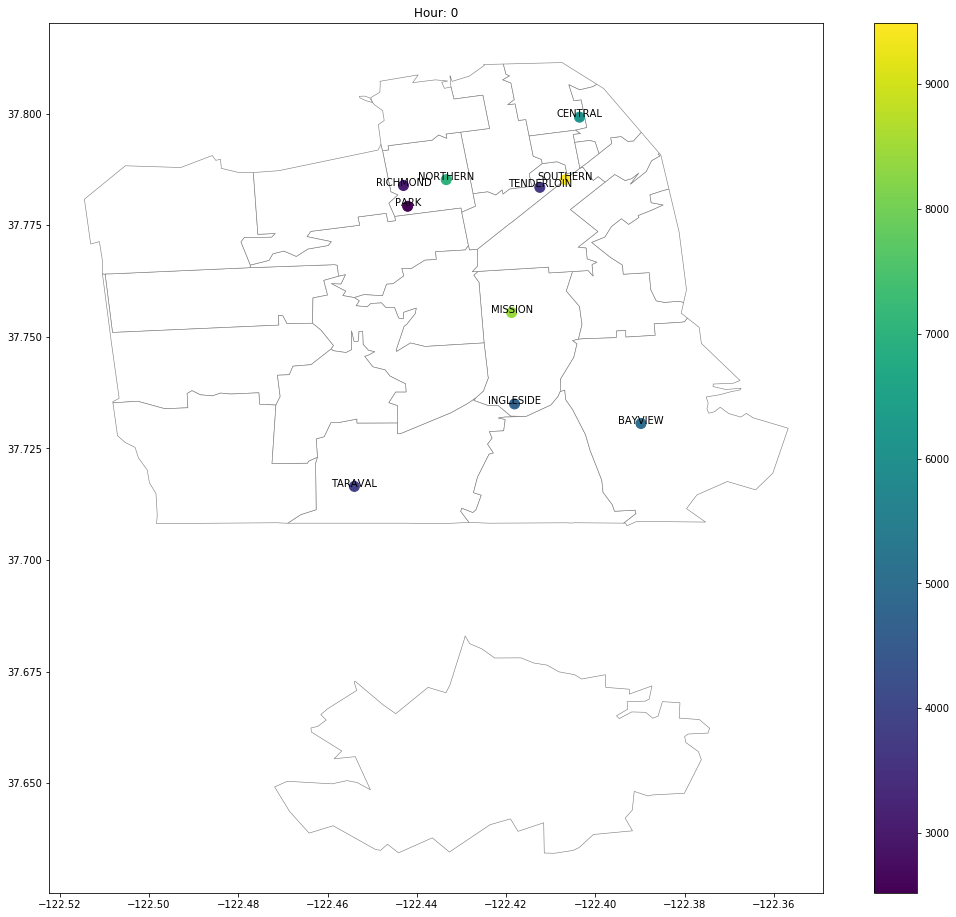

        index  count
0     MISSION   5829
1    SOUTHERN   5555
2    NORTHERN   4542
3     CENTRAL   3887
4   INGLESIDE   2437
5     BAYVIEW   2380
6  TENDERLOIN   2154
7     TARAVAL   1809
8    RICHMOND   1556
9        PARK   1444


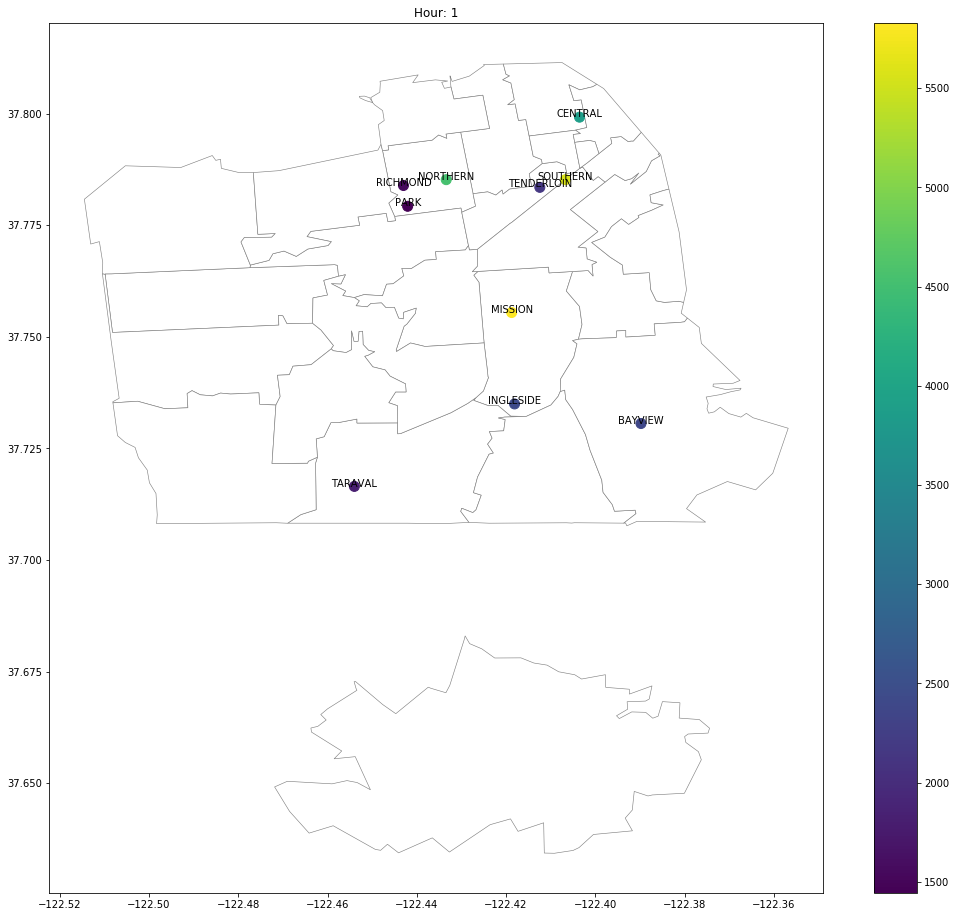

        index  count
0    SOUTHERN   4547
1     MISSION   4513
2    NORTHERN   3613
3     CENTRAL   3261
4   INGLESIDE   2140
5  TENDERLOIN   1871
6     BAYVIEW   1853
7     TARAVAL   1616
8    RICHMOND   1205
9        PARK   1175


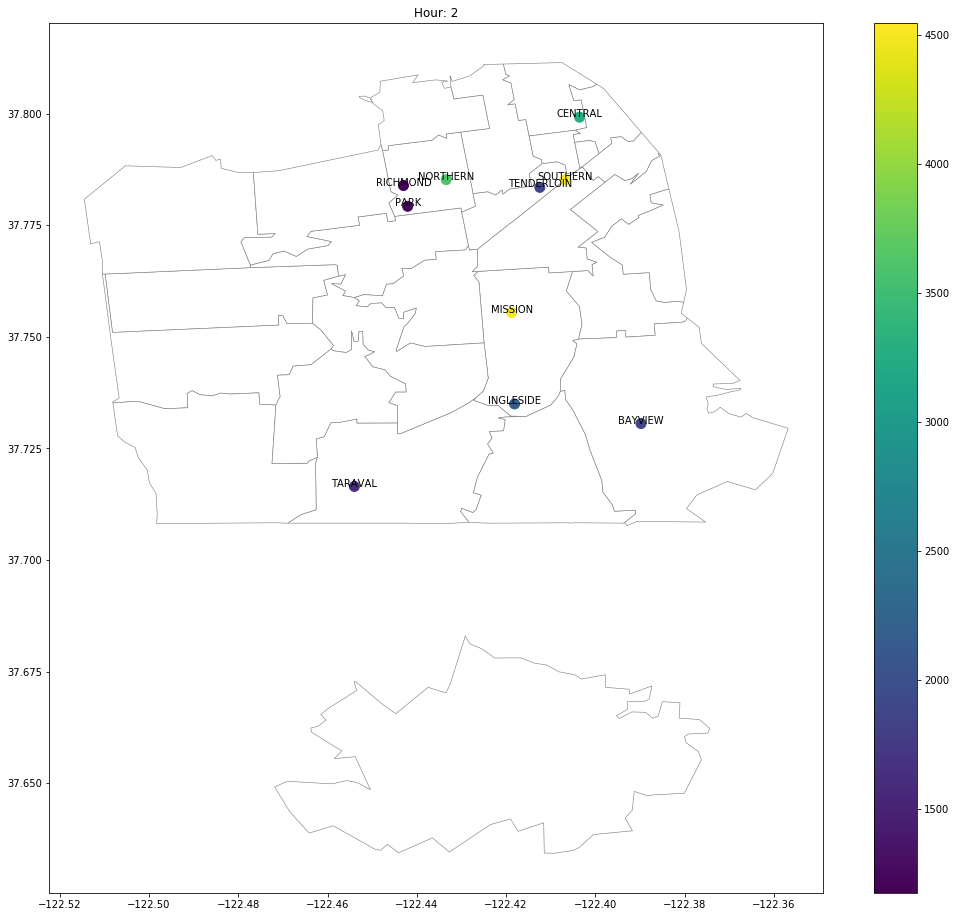

        index  count
0     MISSION   2836
1    SOUTHERN   2728
2    NORTHERN   2489
3     CENTRAL   1808
4   INGLESIDE   1517
5     BAYVIEW   1445
6  TENDERLOIN   1296
7     TARAVAL   1201
8        PARK    921
9    RICHMOND    753


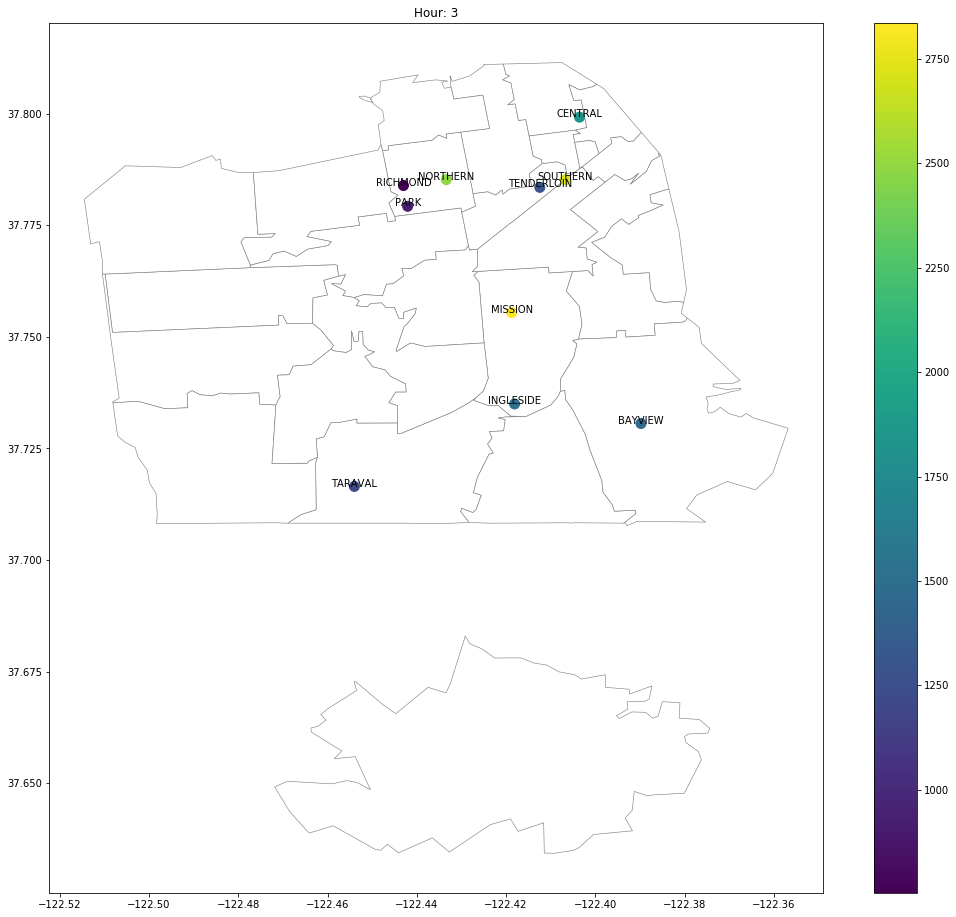

        index  count
0     MISSION   2008
1    SOUTHERN   1987
2    NORTHERN   1691
3     CENTRAL   1212
4     BAYVIEW   1167
5   INGLESIDE   1046
6  TENDERLOIN    950
7     TARAVAL    770
8        PARK    632
9    RICHMOND    517


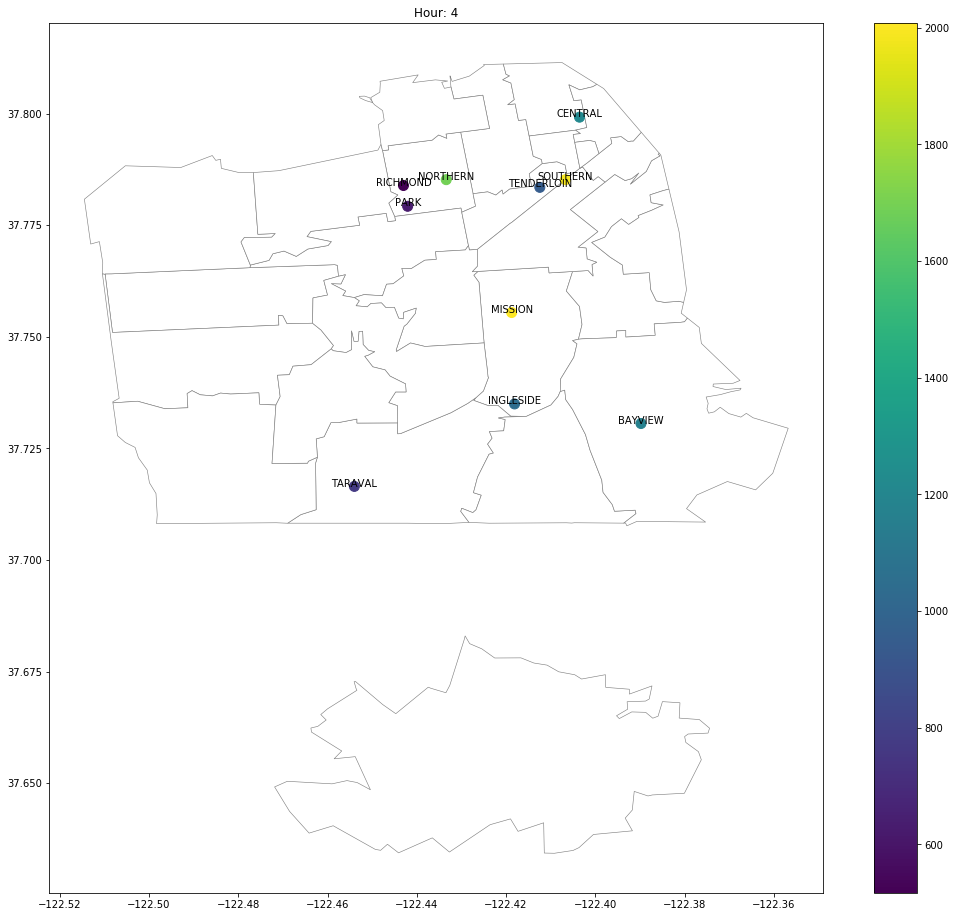

        index  count
0    SOUTHERN   1804
1     MISSION   1556
2  TENDERLOIN   1432
3    NORTHERN   1429
4     CENTRAL   1149
5     BAYVIEW   1066
6   INGLESIDE    905
7     TARAVAL    655
8        PARK    586
9    RICHMOND    479


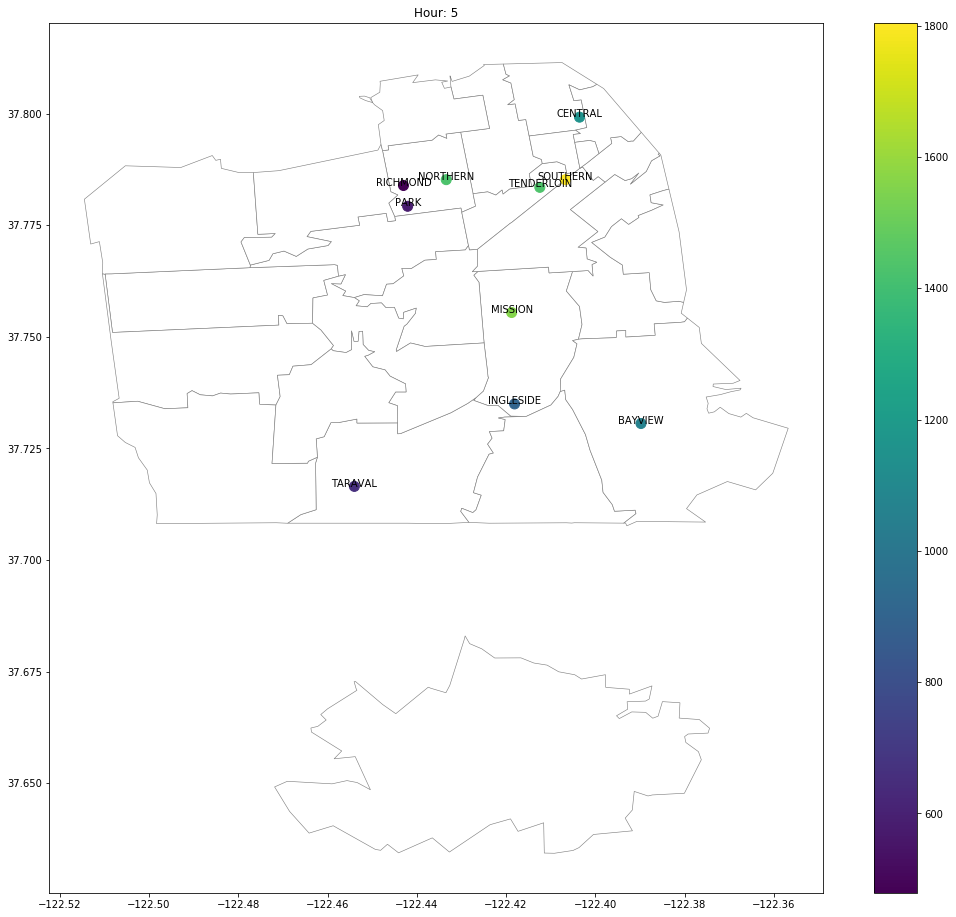

        index  count
0    SOUTHERN   2744
1  TENDERLOIN   2180
2     MISSION   2017
3    NORTHERN   1979
4     BAYVIEW   1563
5     CENTRAL   1340
6   INGLESIDE   1230
7     TARAVAL   1045
8        PARK    918
9    RICHMOND    727


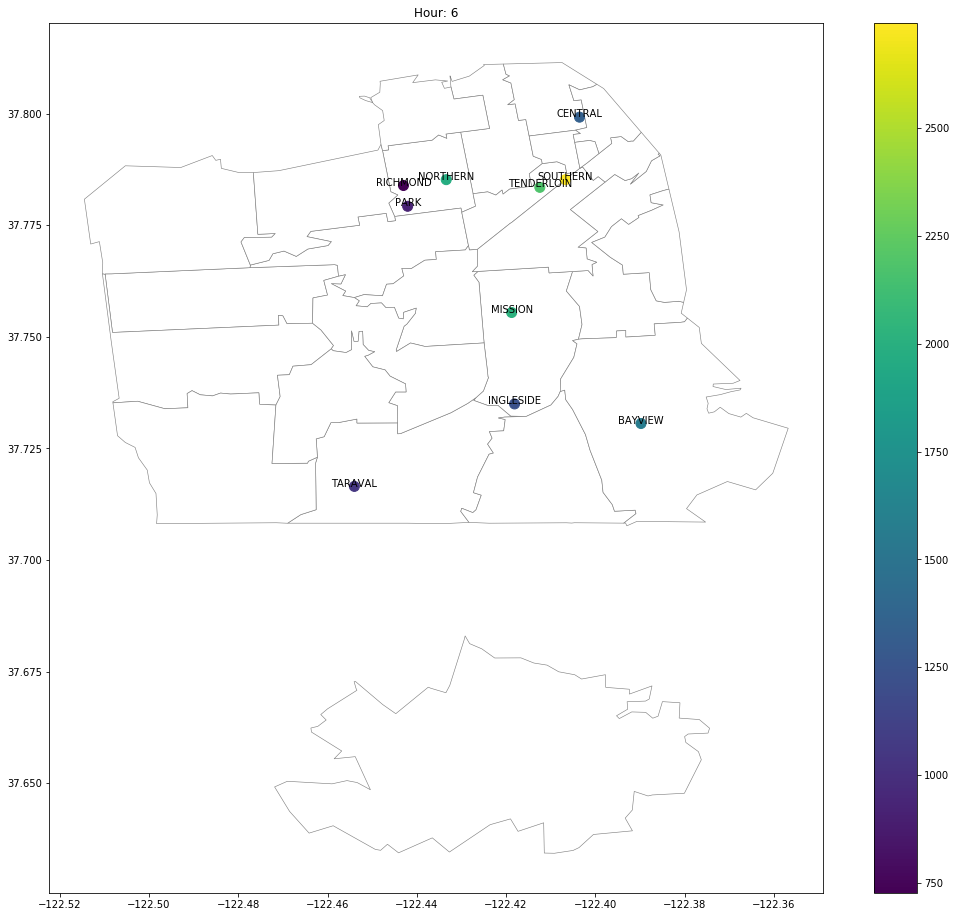

        index  count
0    SOUTHERN   4515
1     BAYVIEW   3010
2     MISSION   2927
3    NORTHERN   2707
4  TENDERLOIN   2441
5   INGLESIDE   2255
6     CENTRAL   2080
7        PARK   2013
8     TARAVAL   1939
9    RICHMOND   1258


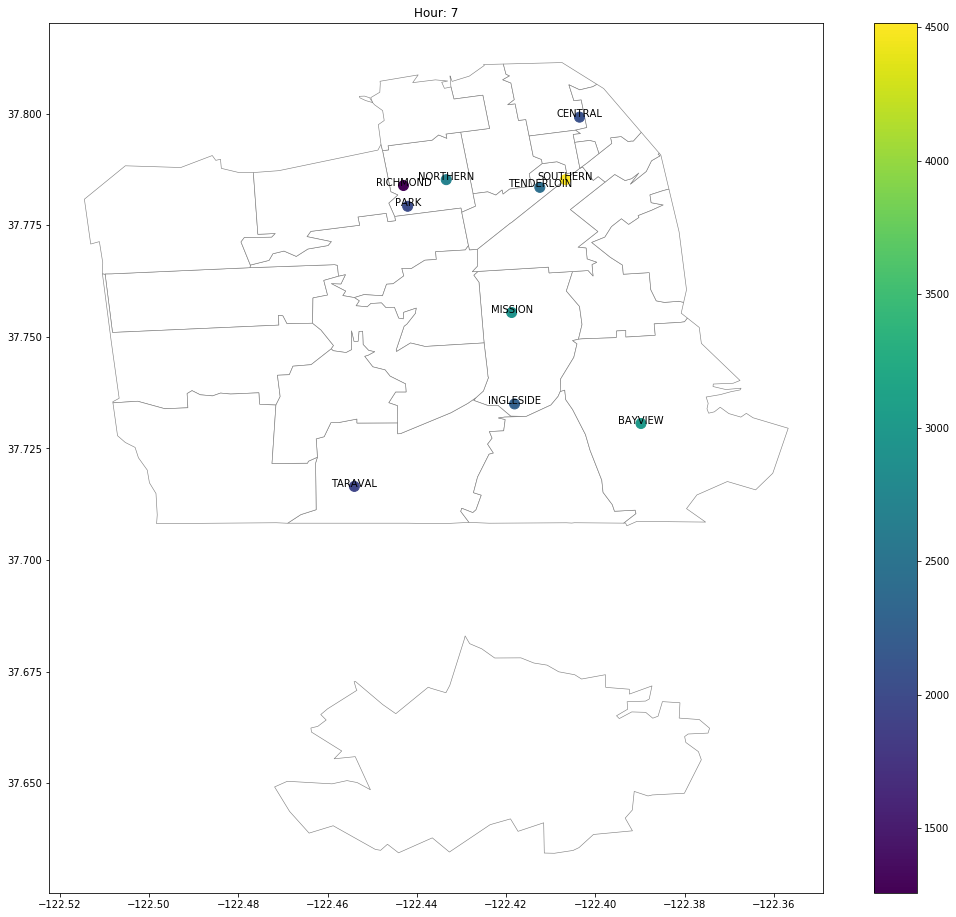

        index  count
0    SOUTHERN   6695
1     BAYVIEW   4475
2    NORTHERN   4286
3     MISSION   4231
4   INGLESIDE   3377
5     CENTRAL   3270
6     TARAVAL   3072
7  TENDERLOIN   2760
8        PARK   2618
9    RICHMOND   2032


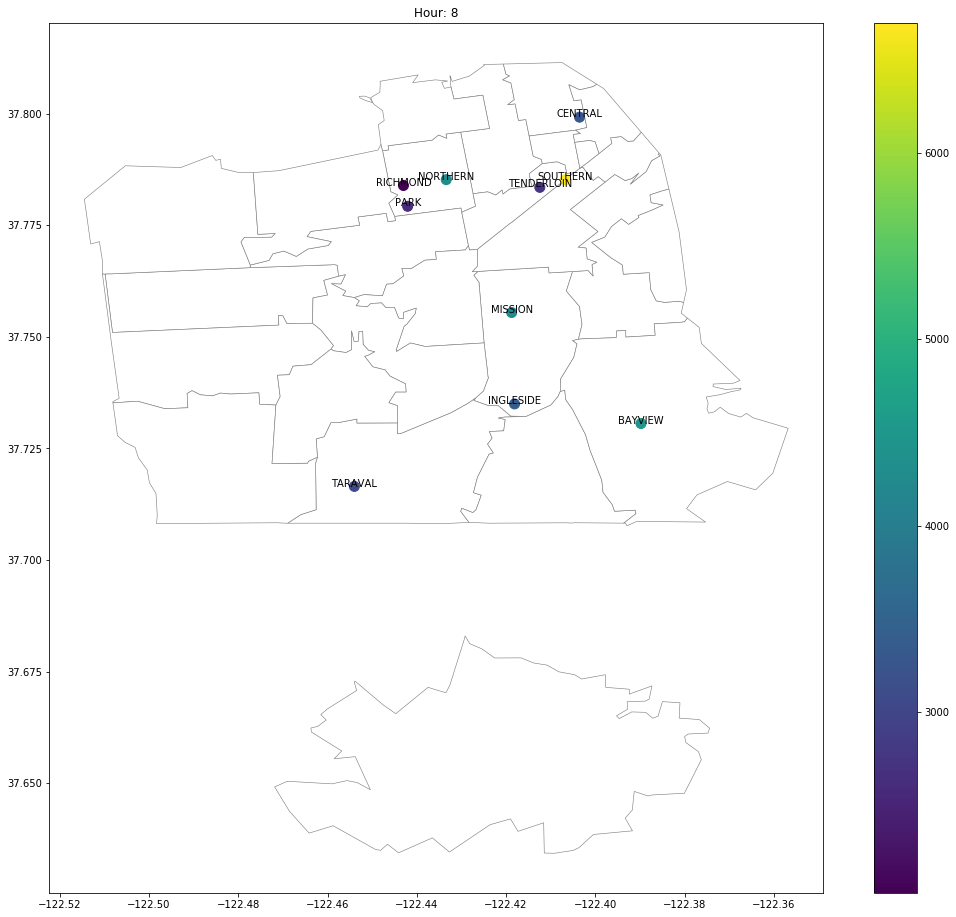

        index  count
0    SOUTHERN   7584
1     MISSION   4632
2     BAYVIEW   4543
3    NORTHERN   4523
4     CENTRAL   4195
5   INGLESIDE   3674
6     TARAVAL   3299
7  TENDERLOIN   3078
8        PARK   2570
9    RICHMOND   2302


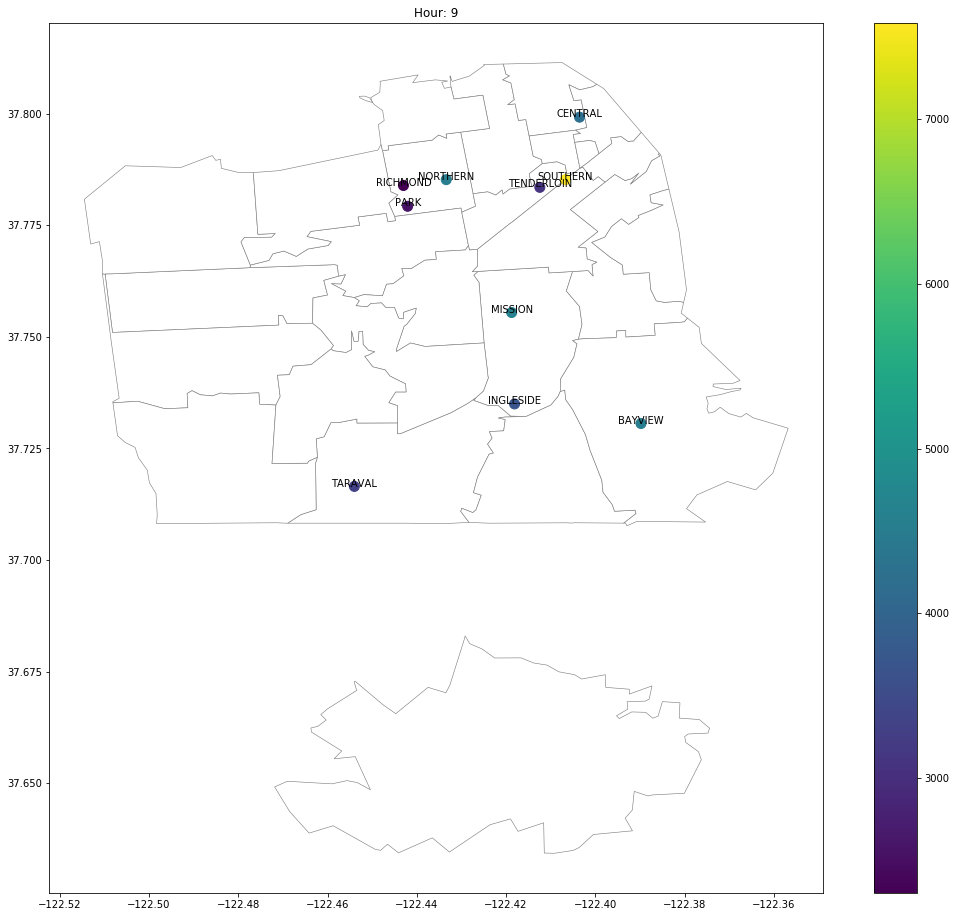

        index  count
0    SOUTHERN   8296
1     MISSION   4923
2    NORTHERN   4836
3     CENTRAL   4717
4     BAYVIEW   4425
5   INGLESIDE   3603
6     TARAVAL   3450
7  TENDERLOIN   3405
8        PARK   2816
9    RICHMOND   2620


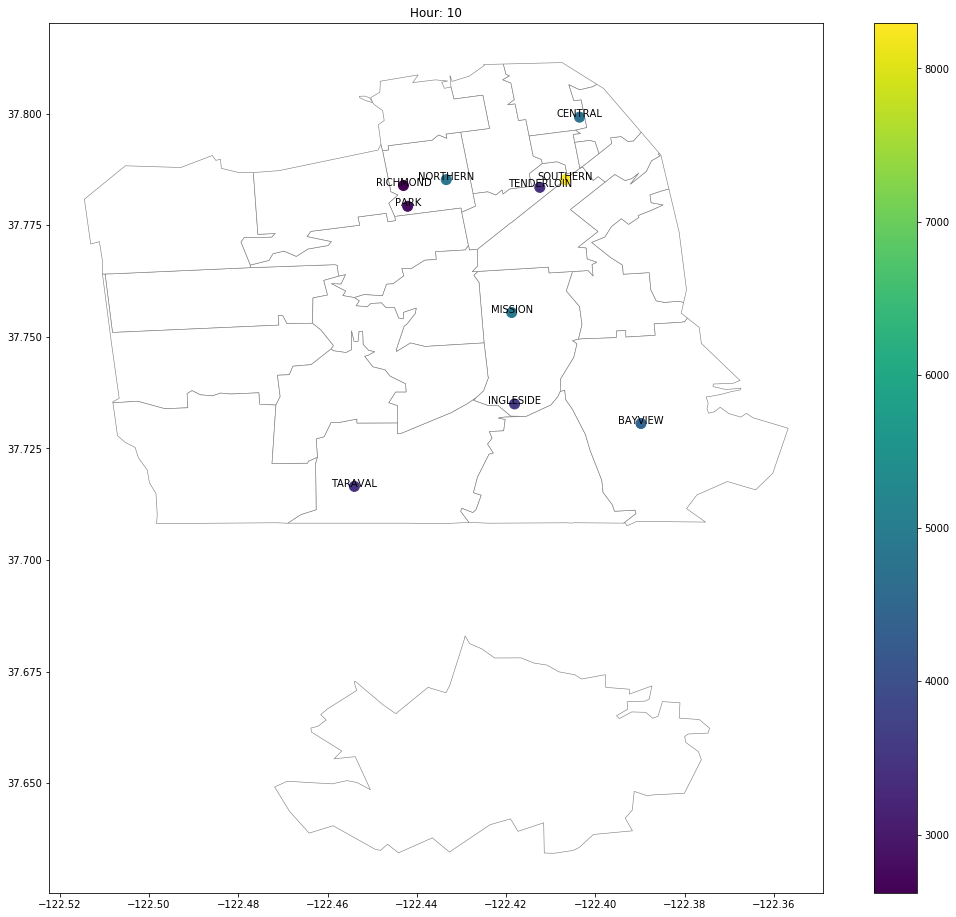

        index  count
0    SOUTHERN   8952
1     MISSION   5481
2     CENTRAL   4907
3    NORTHERN   4890
4     BAYVIEW   4223
5   INGLESIDE   3728
6  TENDERLOIN   3702
7     TARAVAL   3474
8        PARK   2878
9    RICHMOND   2804


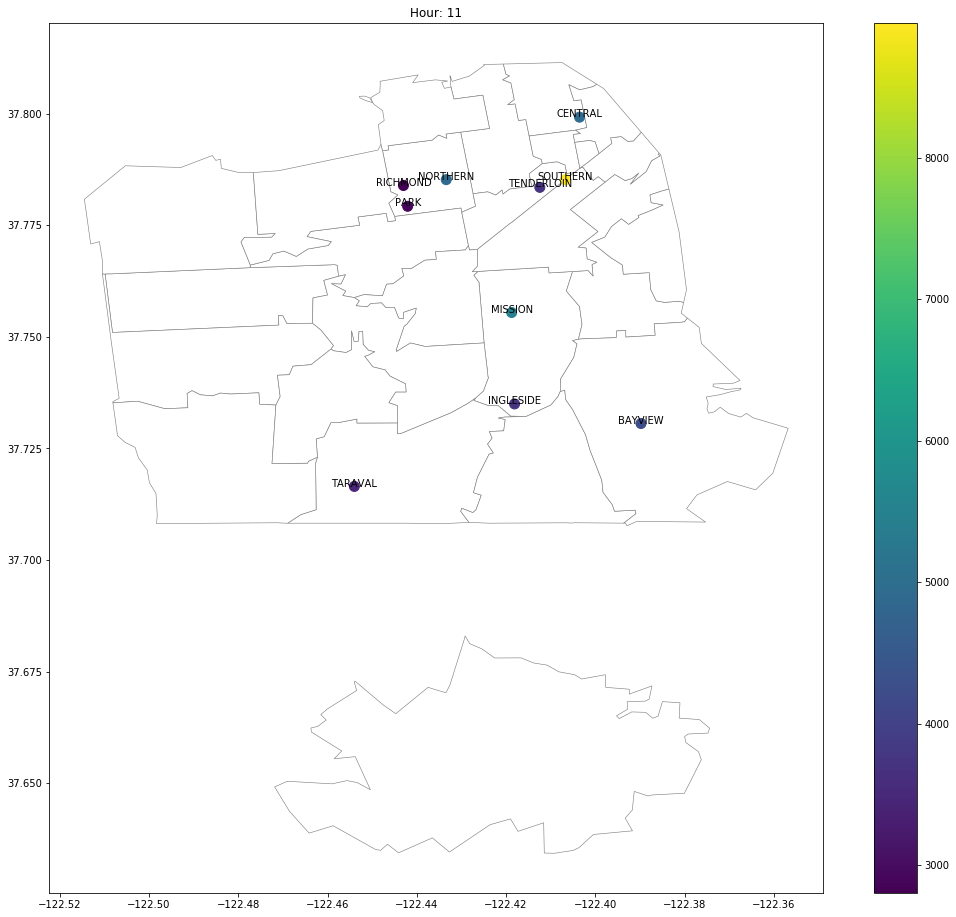

        index  count
0    SOUTHERN  11108
1     MISSION   7603
2    NORTHERN   6950
3     CENTRAL   6481
4     BAYVIEW   5715
5   INGLESIDE   5502
6     TARAVAL   5435
7  TENDERLOIN   4406
8        PARK   4024
9    RICHMOND   3986


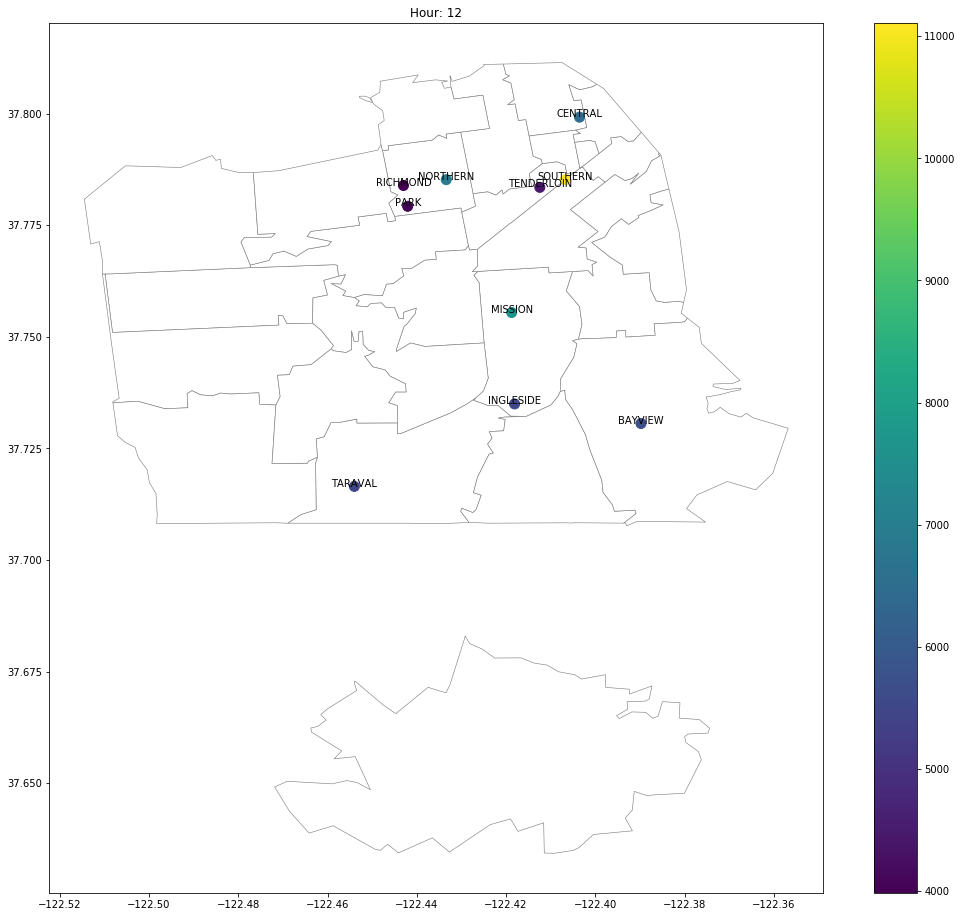

        index  count
0    SOUTHERN   9925
1     MISSION   6032
2    NORTHERN   5513
3     CENTRAL   5350
4     BAYVIEW   4720
5  TENDERLOIN   4638
6   INGLESIDE   3886
7     TARAVAL   3654
8        PARK   3112
9    RICHMOND   2881


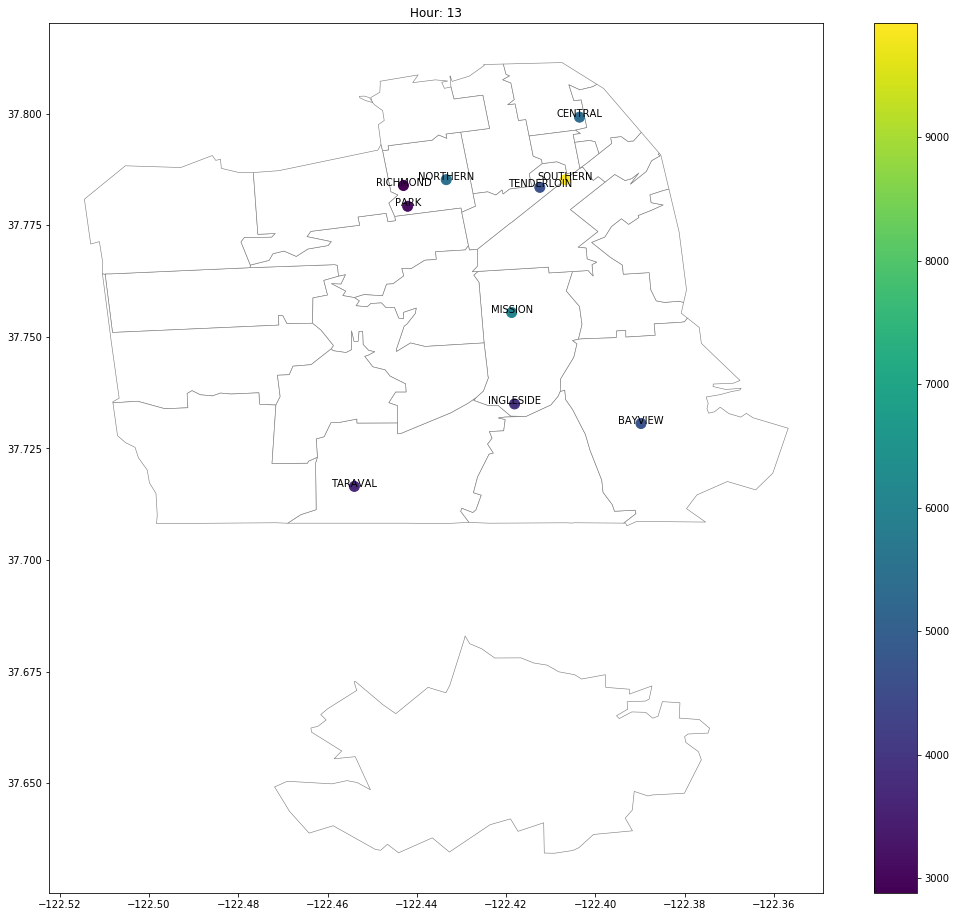

        index  count
0    SOUTHERN  10074
1     MISSION   6166
2     CENTRAL   5663
3    NORTHERN   5620
4     BAYVIEW   4952
5  TENDERLOIN   4748
6   INGLESIDE   4009
7     TARAVAL   3773
8        PARK   3064
9    RICHMOND   2945


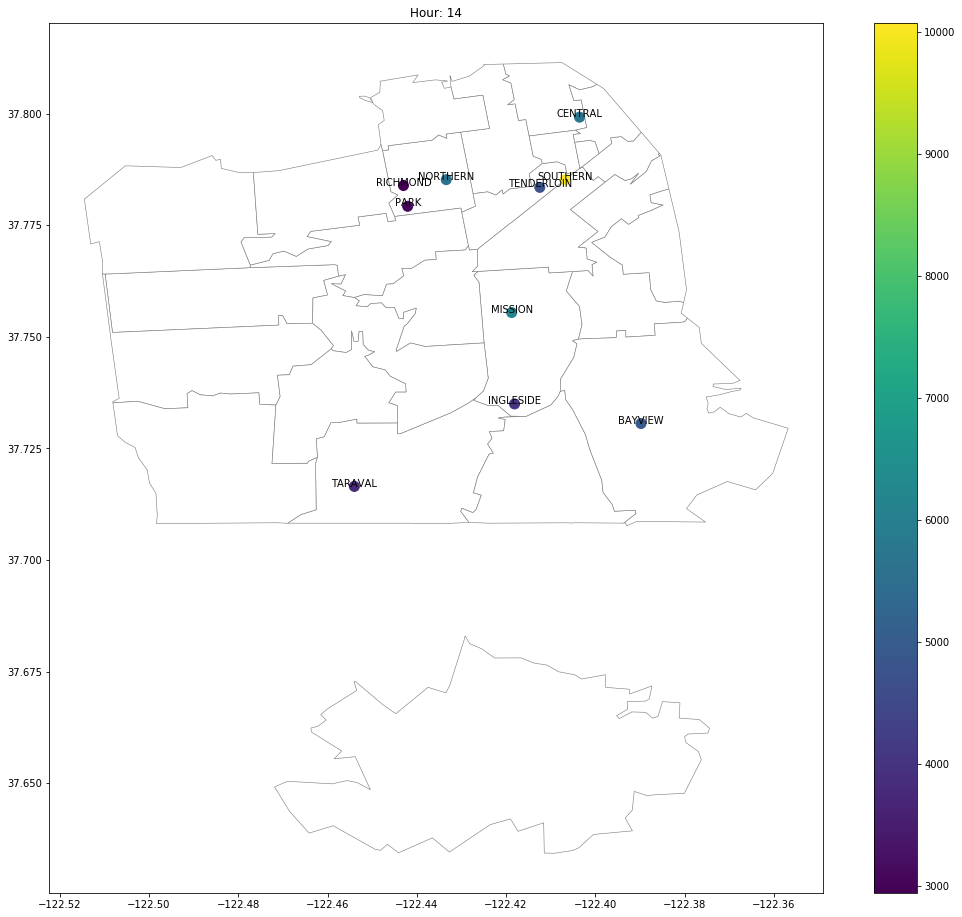

        index  count
0    SOUTHERN  10672
1     MISSION   6757
2    NORTHERN   6302
3     CENTRAL   6096
4  TENDERLOIN   5376
5     BAYVIEW   5321
6   INGLESIDE   4519
7     TARAVAL   4356
8        PARK   3558
9    RICHMOND   3185


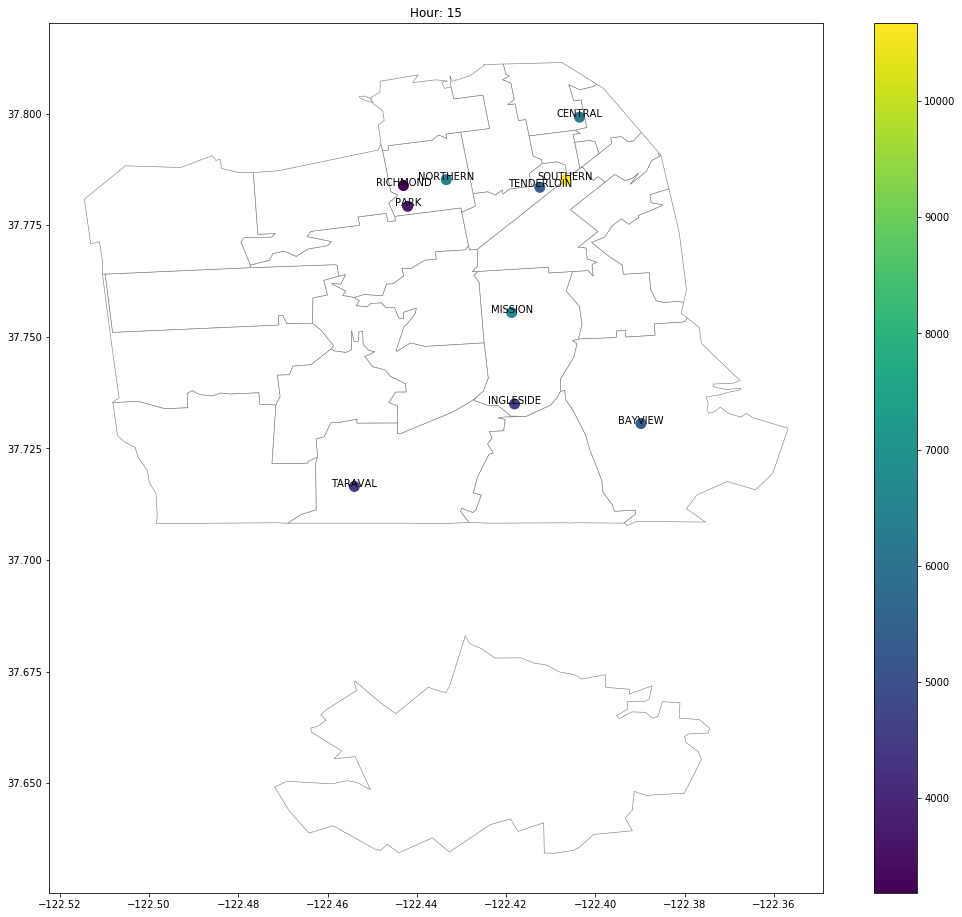

        index  count
0    SOUTHERN  11576
1     MISSION   7313
2    NORTHERN   6604
3     CENTRAL   6108
4  TENDERLOIN   5780
5     BAYVIEW   5758
6   INGLESIDE   4824
7     TARAVAL   4106
8        PARK   3694
9    RICHMOND   3186


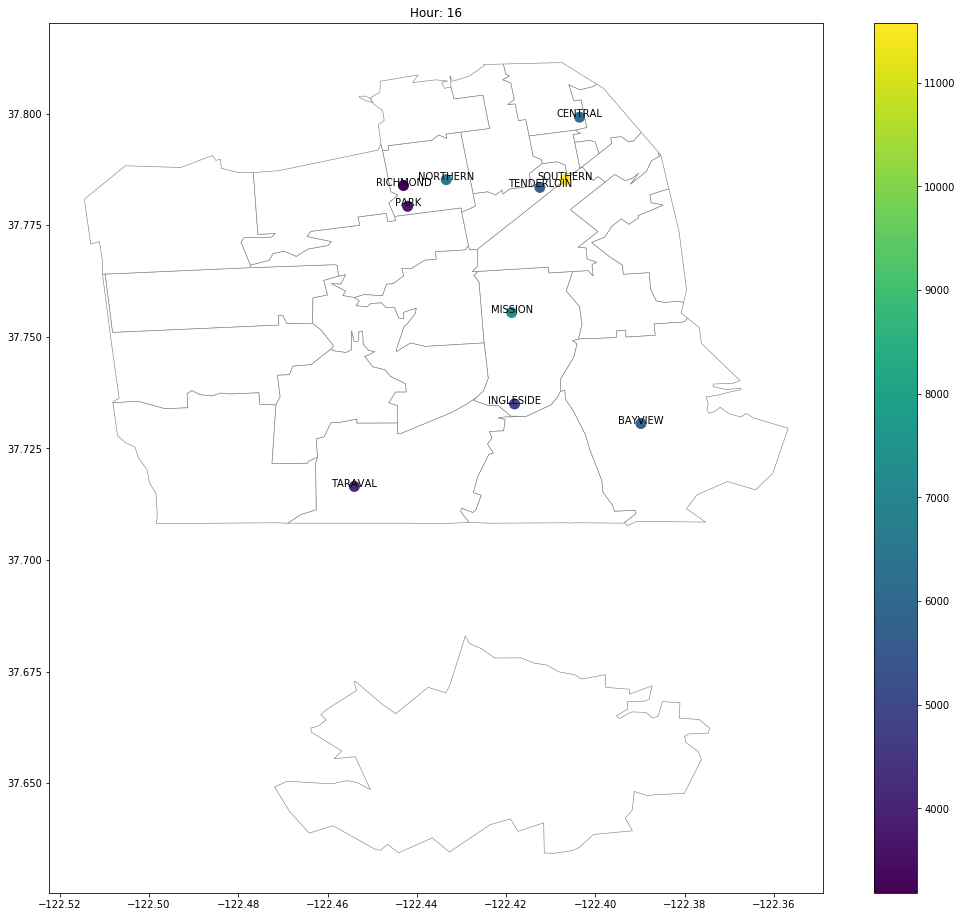

        index  count
0    SOUTHERN  12901
1     MISSION   7950
2    NORTHERN   7065
3     CENTRAL   6654
4     BAYVIEW   6299
5  TENDERLOIN   5681
6   INGLESIDE   5389
7     TARAVAL   4362
8        PARK   4020
9    RICHMOND   3403


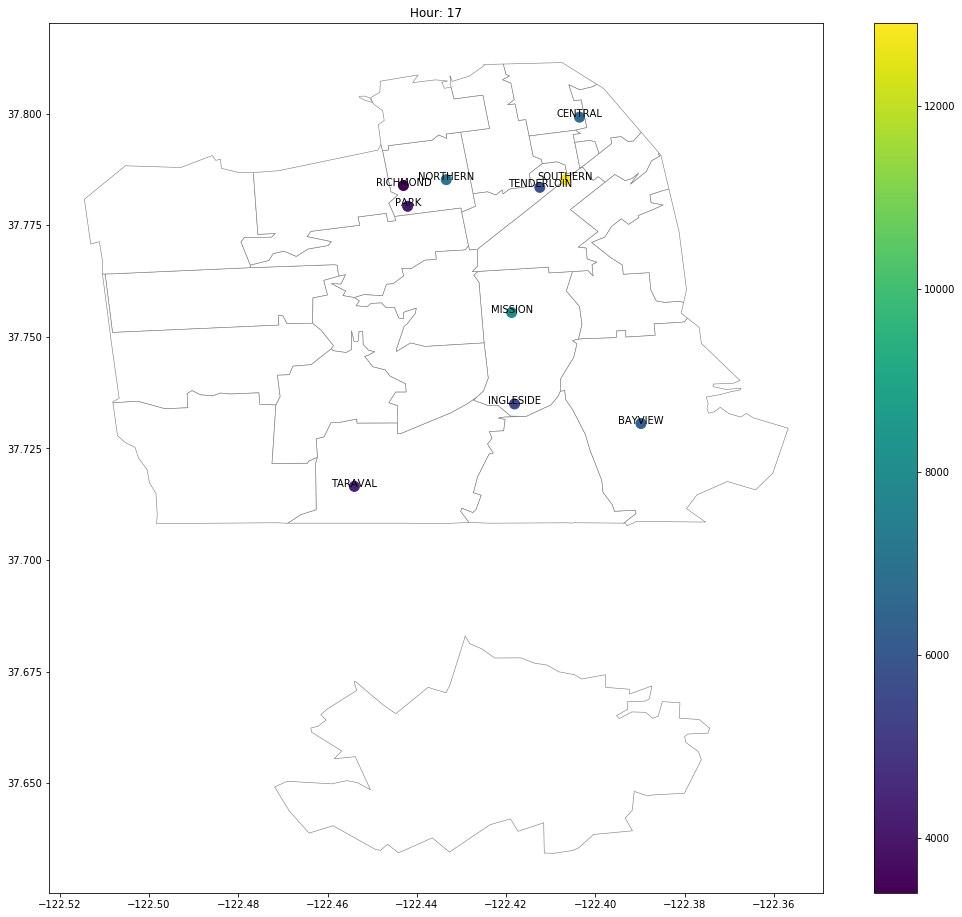

        index  count
0    SOUTHERN  13422
1     MISSION   8210
2    NORTHERN   7862
3     CENTRAL   7088
4     BAYVIEW   6670
5   INGLESIDE   5769
6  TENDERLOIN   5317
7     TARAVAL   4707
8        PARK   4000
9    RICHMOND   3620


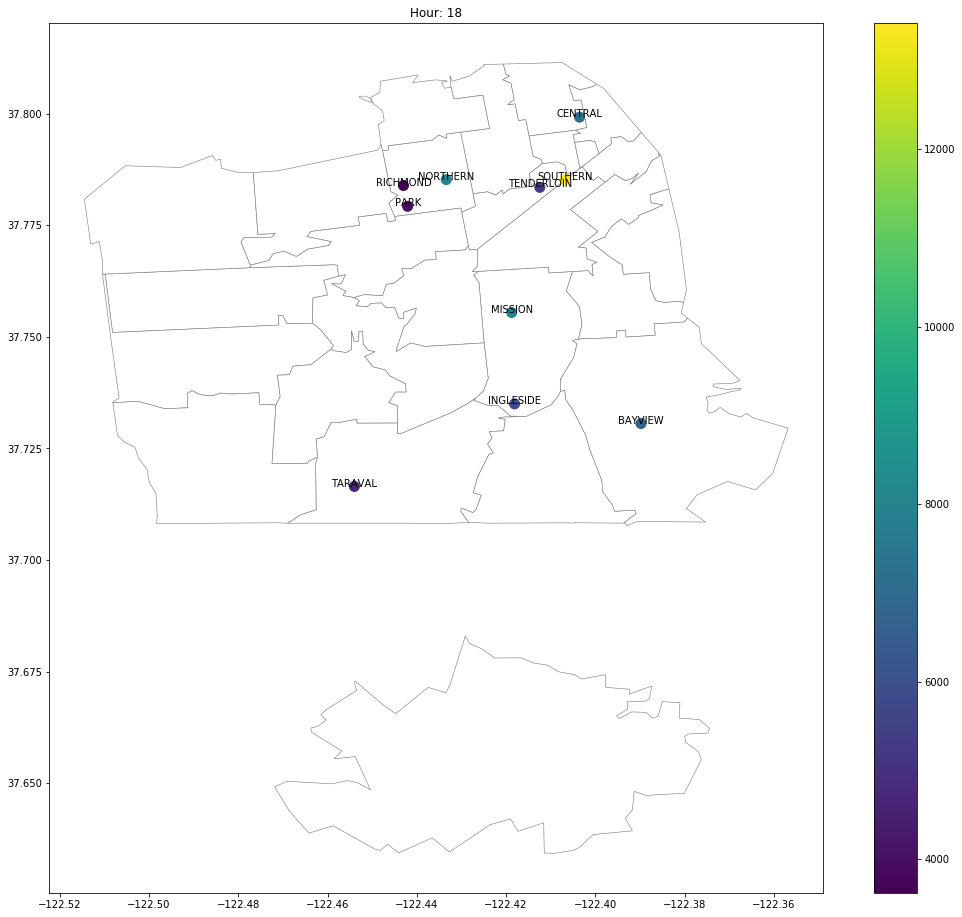

        index  count
0    SOUTHERN  12445
1    NORTHERN   7630
2     MISSION   7477
3     CENTRAL   6444
4     BAYVIEW   6200
5   INGLESIDE   5272
6  TENDERLOIN   4588
7     TARAVAL   4090
8        PARK   3299
9    RICHMOND   3169


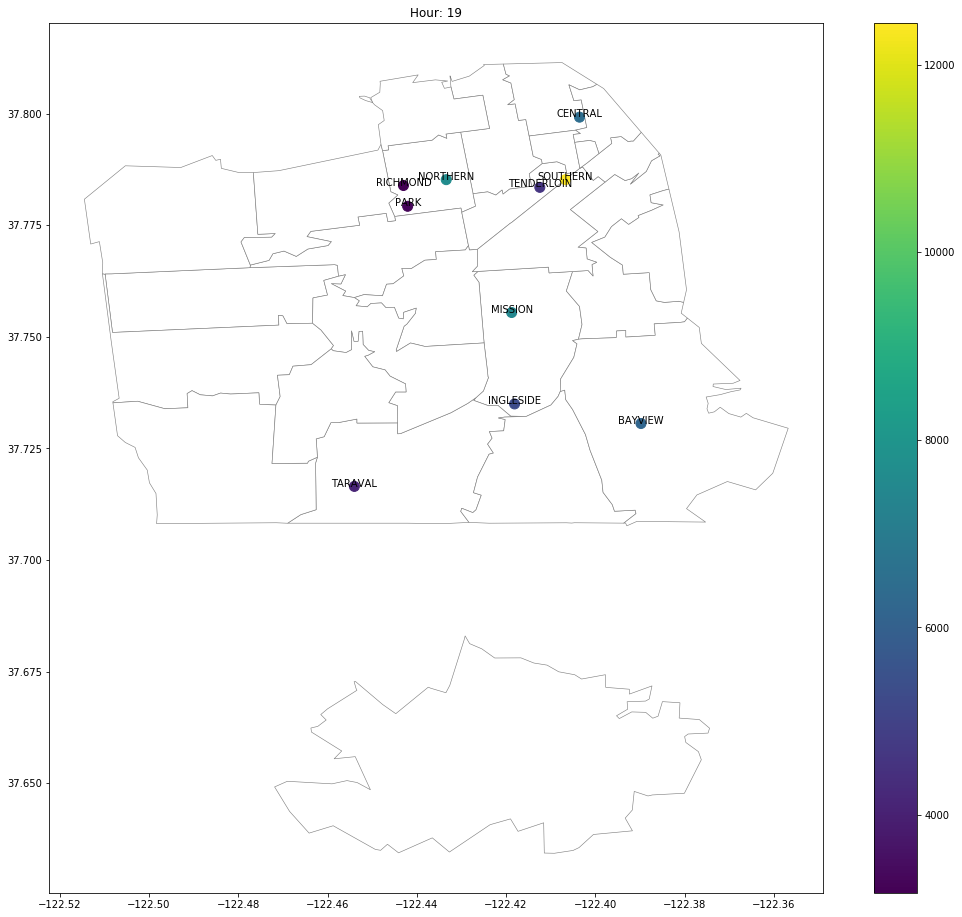

        index  count
0    SOUTHERN  10752
1     MISSION   7197
2    NORTHERN   6866
3     CENTRAL   5675
4     BAYVIEW   5523
5   INGLESIDE   4955
6  TENDERLOIN   4126
7     TARAVAL   4107
8        PARK   3081
9    RICHMOND   2913


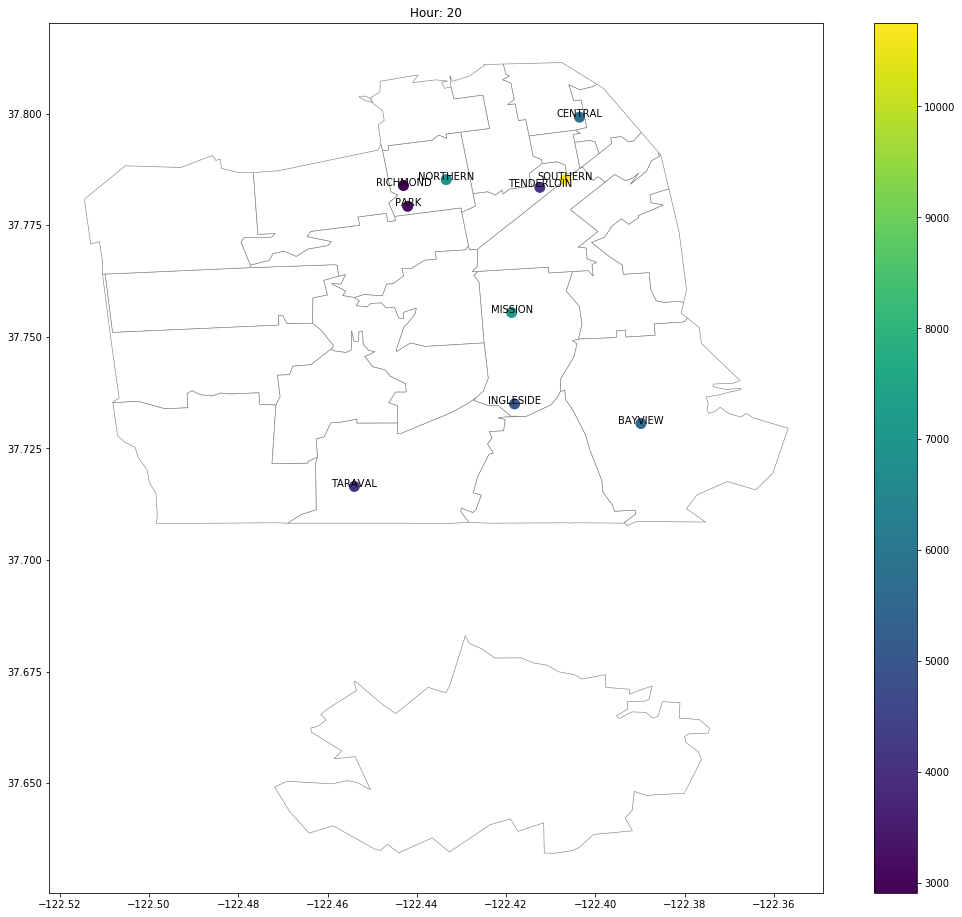

        index  count
0    SOUTHERN   9862
1     MISSION   7013
2    NORTHERN   6537
3     CENTRAL   5231
4     BAYVIEW   5147
5   INGLESIDE   4859
6     TARAVAL   3757
7  TENDERLOIN   3624
8        PARK   2740
9    RICHMOND   2646


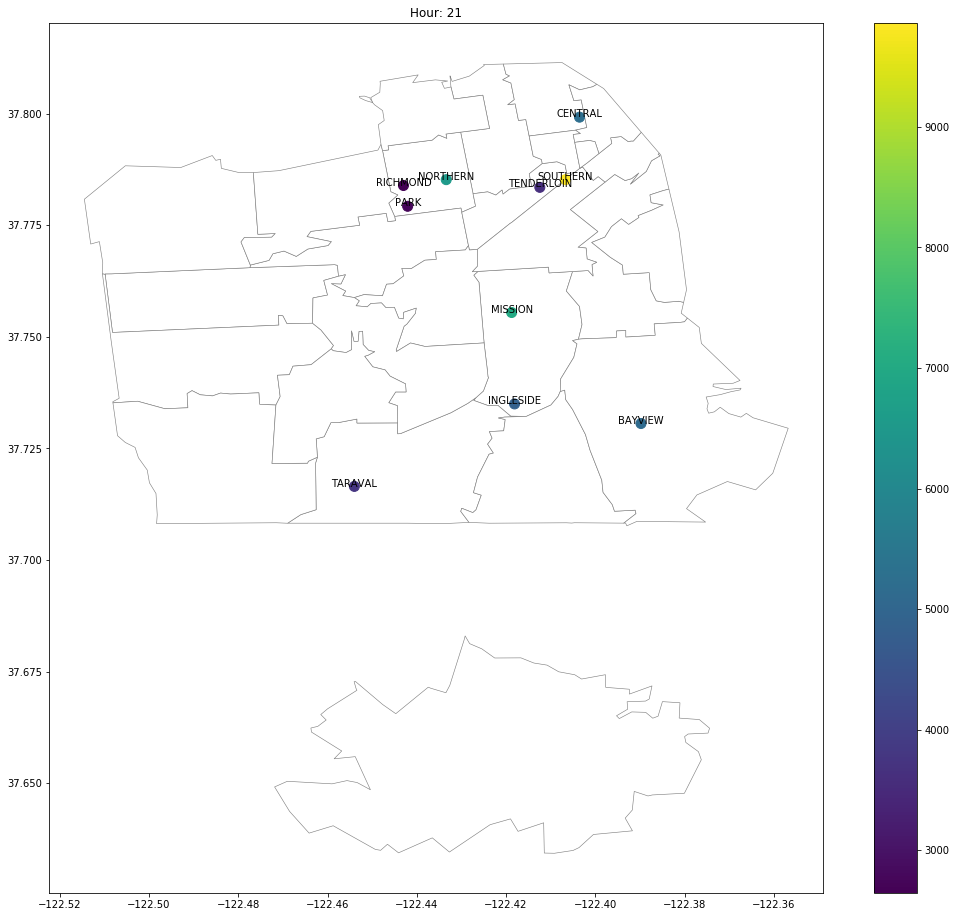

        index  count
0    SOUTHERN   9574
1     MISSION   7556
2    NORTHERN   6959
3     BAYVIEW   5556
4     CENTRAL   5386
5   INGLESIDE   5000
6     TARAVAL   3728
7  TENDERLOIN   3499
8        PARK   2851
9    RICHMOND   2660


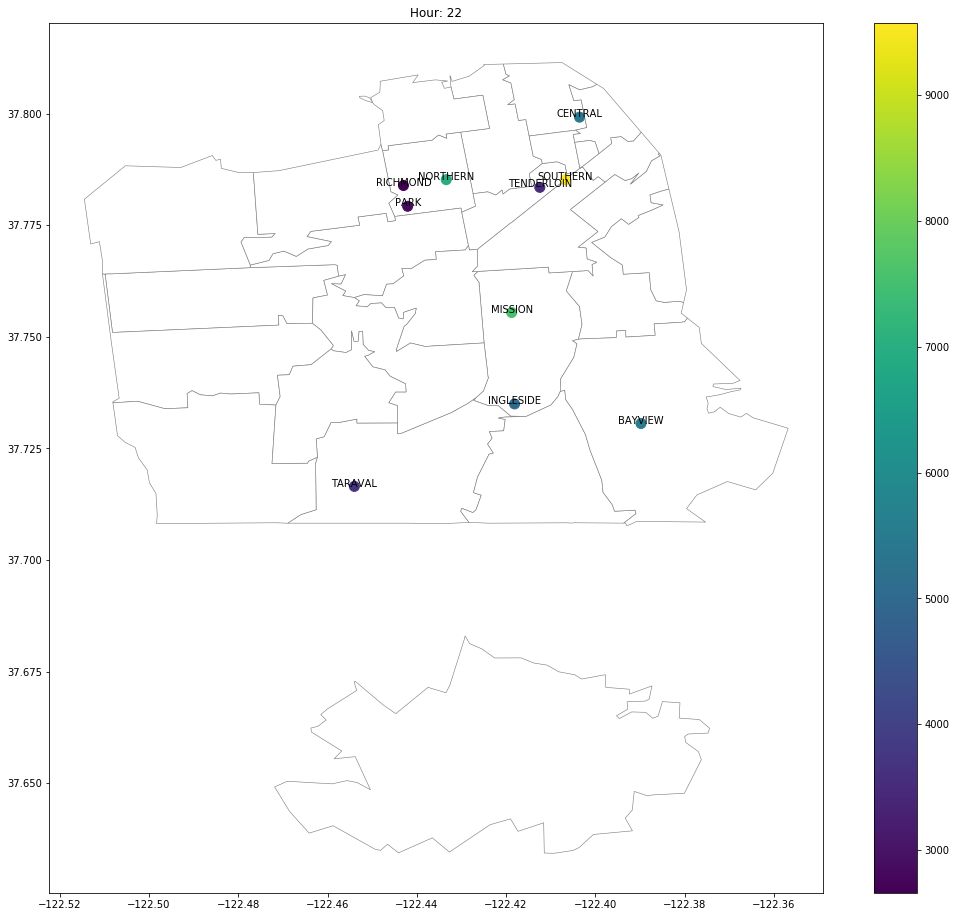

        index  count
0    SOUTHERN   8973
1     MISSION   7572
2    NORTHERN   6462
3     CENTRAL   5161
4     BAYVIEW   4629
5   INGLESIDE   4426
6  TENDERLOIN   3299
7     TARAVAL   3204
8        PARK   2437
9    RICHMOND   2320


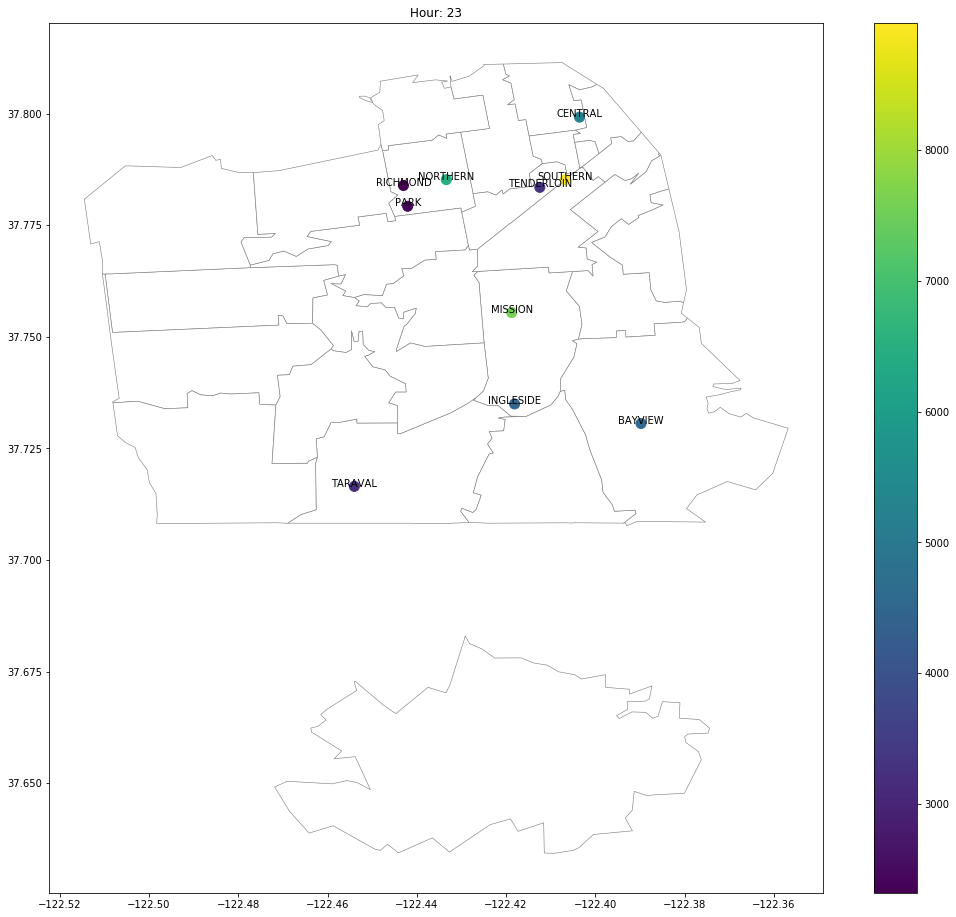

In [51]:
for i in range(24):
    
    
    ax = aggregated_zillow_Polygon.plot(color = "white",edgecolor = "gray" , legend=True,
              k=3, linewidth = 0.6, figsize = (18, 16) )
    aggCrime[i].plot(ax = ax, column = "count", markersize = 100, legend=True)
#     aggregated_zillow_Polygon.plot(ax = ax, column = "Average_MedianSoldPrice_AllHome", cmap='OrRd')


    def add_label(row):
        coords = row.geometry.representative_point().coords[0]
        ax.annotate(row['index'], xy = coords, horizontalalignment = "center")
#         ax.annotate(row['count'], xy = coords, horizontalalignment = "left")
#         ax.annotate('Hour: '+ str(i),
#             xy=(1, 0),
#             xytext=(-20, 20), textcoords='dfadsfdsfsdf',
#             horizontalalignment='right',
#             verticalalignment='bottom')
        


    # Call add_label() on each row.
    aggCrime[i].apply(add_label, axis = 1)
    plt.title('Hour: '+ str(i))
    
    print(aggCrime[i][['index','count']])

    # Don't print out the result from the .apply().
    plt.show()
 

`Which parts of the city are the most dangerous (and at what times)?`

To answer this question we used the crime dataset. We first extracted only the hour from the crime reports. Then we calculated the frequency of how many crimes occured for each hour. Surprisingly, the hour with the most crimes is at 18:00 with 66665 crimes throughout the year, while the least number of crimes was at 5:00 with 11061. We then calculate where these crimes occur at each hour by binning each crime into their respective hour. From our calculation, we can see that the most dangerous parts of the city at the Southern and Mission Districts respectively. Looking at the 18:00 hour, we can see that SOUTHERN district had 13422 crimes yearly, with the MISSION distrct at  8210. Even at the time where crimes least occur (5:00), both Southern and Mission are at the top of the list of where most crimes occur:  SOUTHERN distrct at 1804 crimes and  MISSION distrct at 1556 crimes respectively. Of course as the day goes by, we can see the number of crimes fluctuating, but for the marjority of the day the Southern Distrct and Mission District have most the crimes occuring.